In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib.image as img
import folium
from keplergl import KeplerGl 


### Домашнее задание 1
##### Визуальный анализ данных
#### 1.1. Скачать данные по ссылке 

- Постройте график 
- Назовите график 
- Сделайте именование оси x и оси y
- Сделайте выводы

In [4]:
df = pd.read_csv('./kc_house_data.csv',encoding='latin1')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### 1.2 Изучите стоимости недвижимости

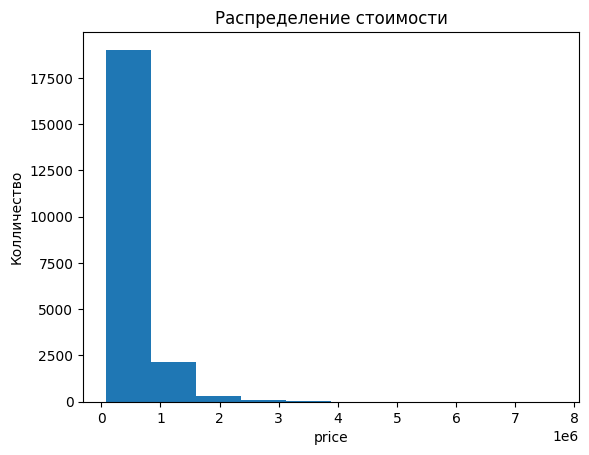

In [8]:
plt.hist(df['price'])
plt.title('Распределение стоимости')
plt.xlabel('price')
plt.ylabel('Колличество');

#### 1.3 Изучите распределение квадратуры жилой площади

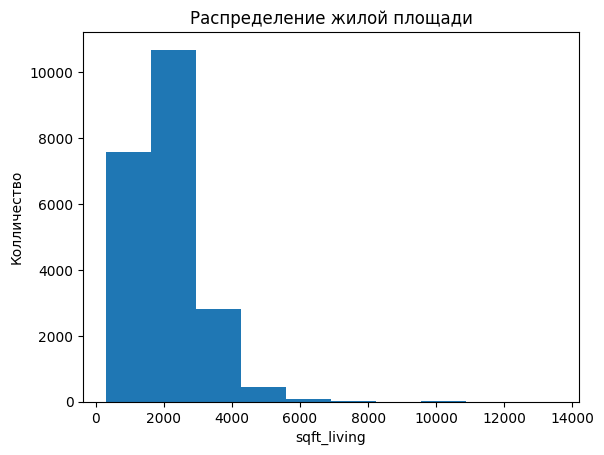

In [7]:
plt.hist(df['sqft_living'])
plt.title('Распределение жилой площади')
plt.xlabel('sqft_living')
plt.ylabel('Колличество');

#### 1.4 Изучите распределение года постройки

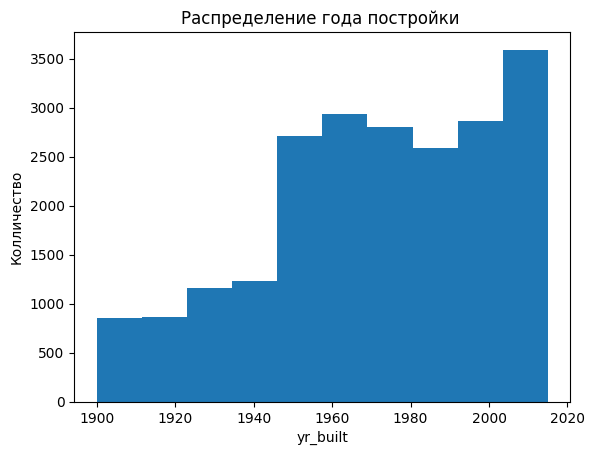

In [9]:
plt.hist(df['yr_built'])
plt.title('Распределение года постройки ')
plt.xlabel('yr_built')
plt.ylabel('Колличество');

### Домашнее задание 2
#### 2.1 Изучите распределение домов от наличия вида на набережную

- Постройте график 
- Сделайте выводы

In [10]:
data = df['waterfront'].value_counts()
name = data.index
value = data.values
data

waterfront
0    21450
1      163
Name: count, dtype: int64

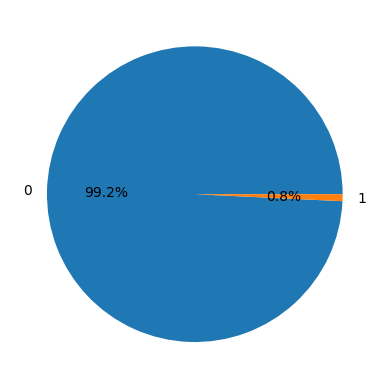

In [13]:
plt.pie(value,autopct='%.1f%%',labels=name);

#### 2.2 Изучите распределение этажей домов

In [14]:
data = df['floors'].value_counts()
name = data.index
value = data.values
data

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

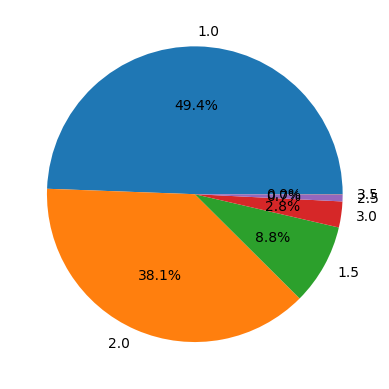

In [15]:
plt.pie(value,autopct='%.1f%%',labels=name);

#### 2.3 Изучите распределение состояния домов

In [16]:
data = df['condition'].value_counts()
name = data.index
value = data.values
data

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

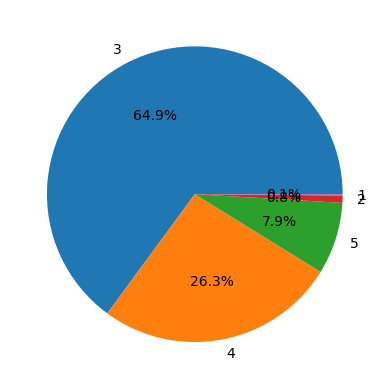

In [17]:
plt.pie(value,autopct='%.1f%%',labels=name);

#### Домашнее задание 3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями

In [ ]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix,1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

In [ ]:
plt.figure(figsize=(10.8))
sns.heatmap(corr_matrix,annot=True,linewidths=.5 cmap='coolwarm');

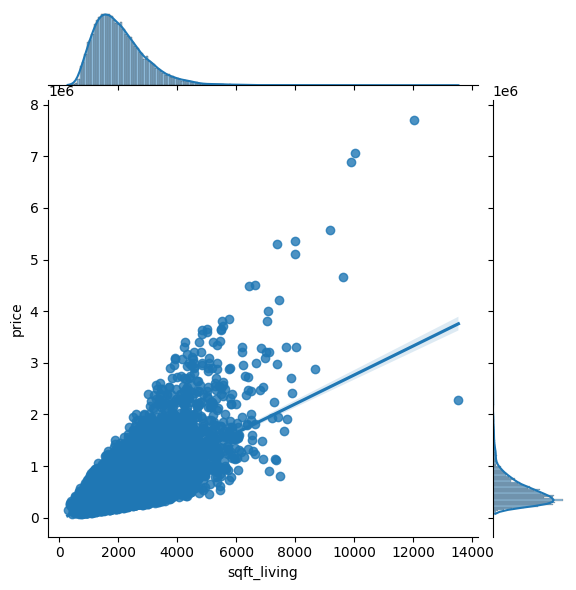

In [31]:
sns.jointplot(x=df['sqft_living'],y=df['price'],kind='reg');

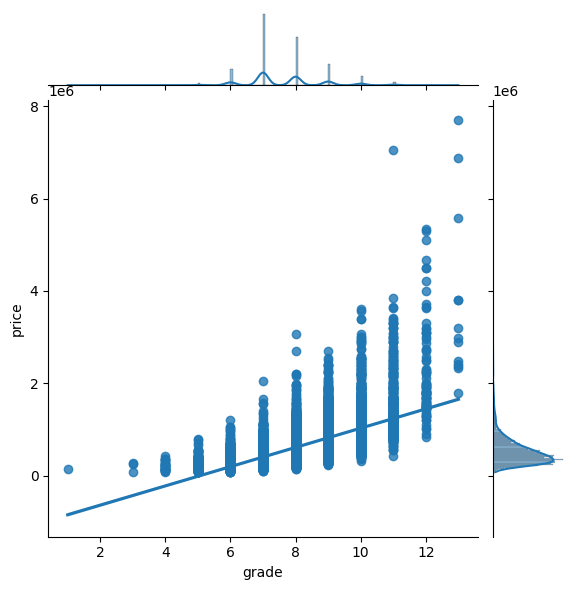

In [32]:
sns.jointplot(x=df['grade'],y=df['price'],kind='reg');

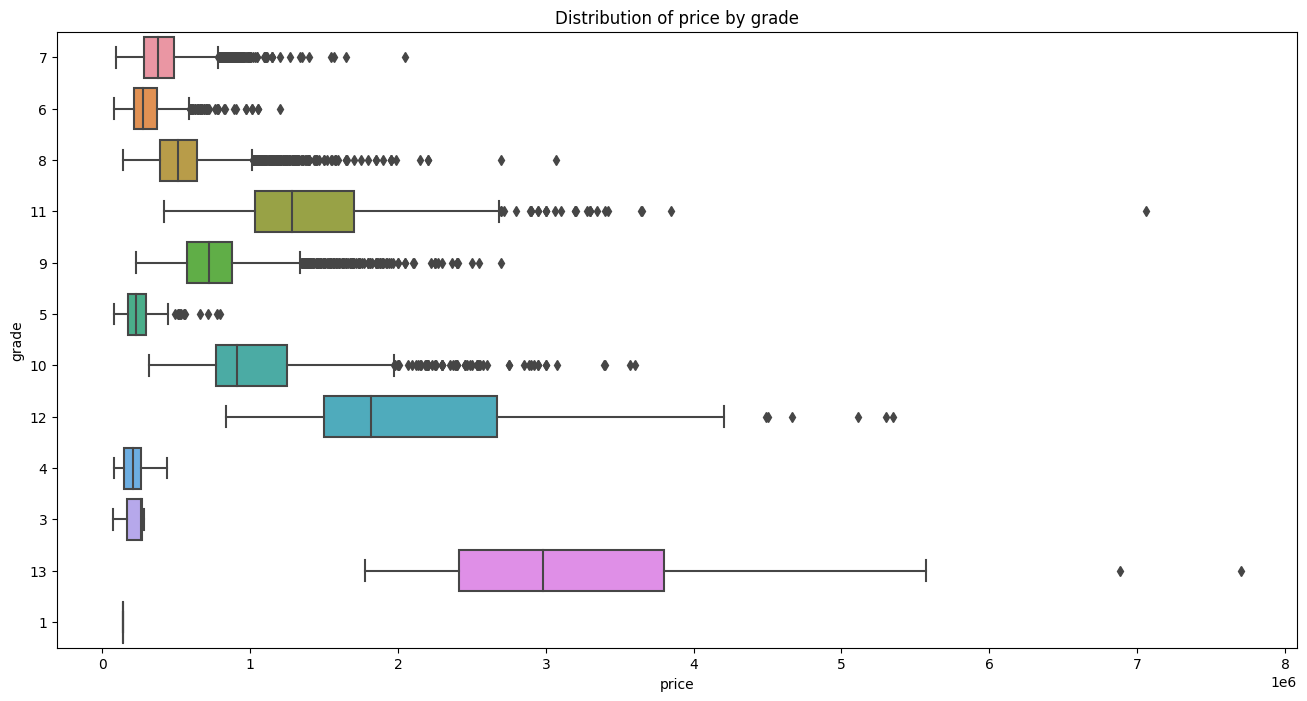

In [34]:
plt.figure(figsize=(16,8))
sns.boxplot(x=df['price'],y=df['grade'].astype('str'),whis=1.5)
plt.xlabel('price')
plt.ylabel('grade')
plt.title('Distribution of price by grade');

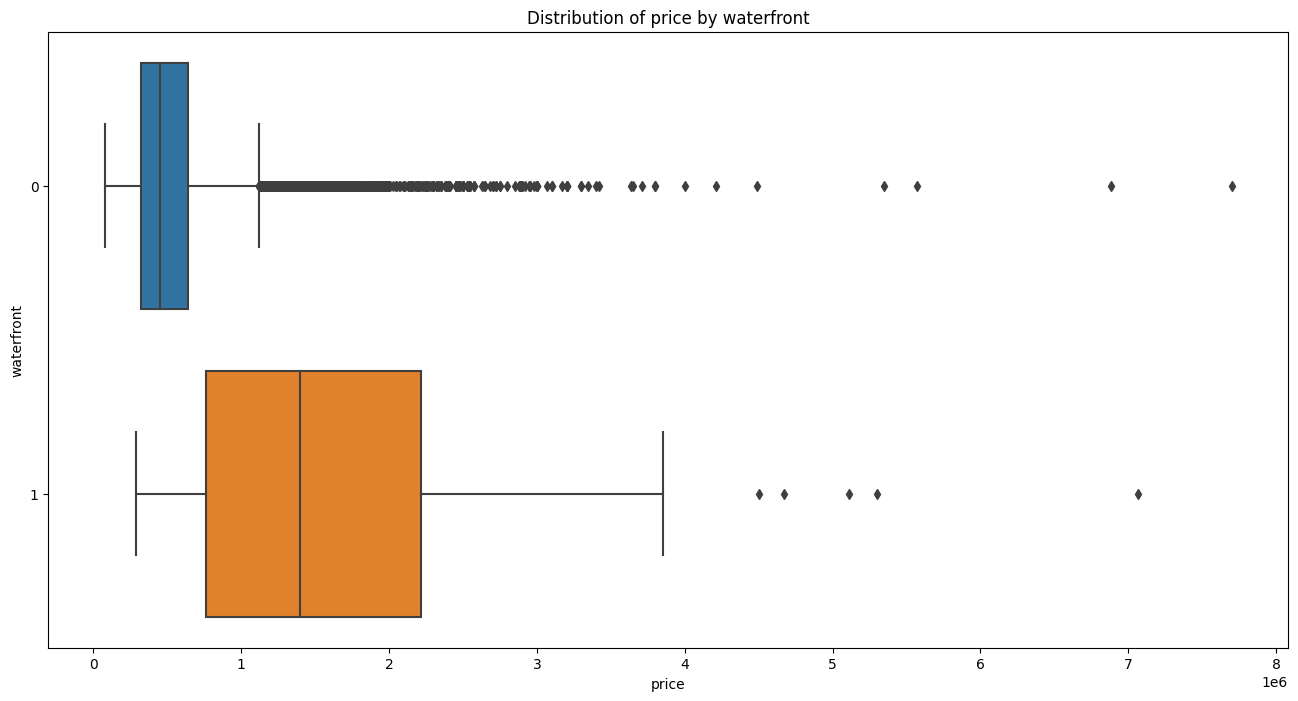

In [35]:
plt.figure(figsize=(16,8))
sns.boxplot(x=df['price'],y=df['waterfront'].astype('str'),whis=1.5)
plt.xlabel('price')
plt.ylabel('waterfront')
plt.title('Distribution of price by waterfront');

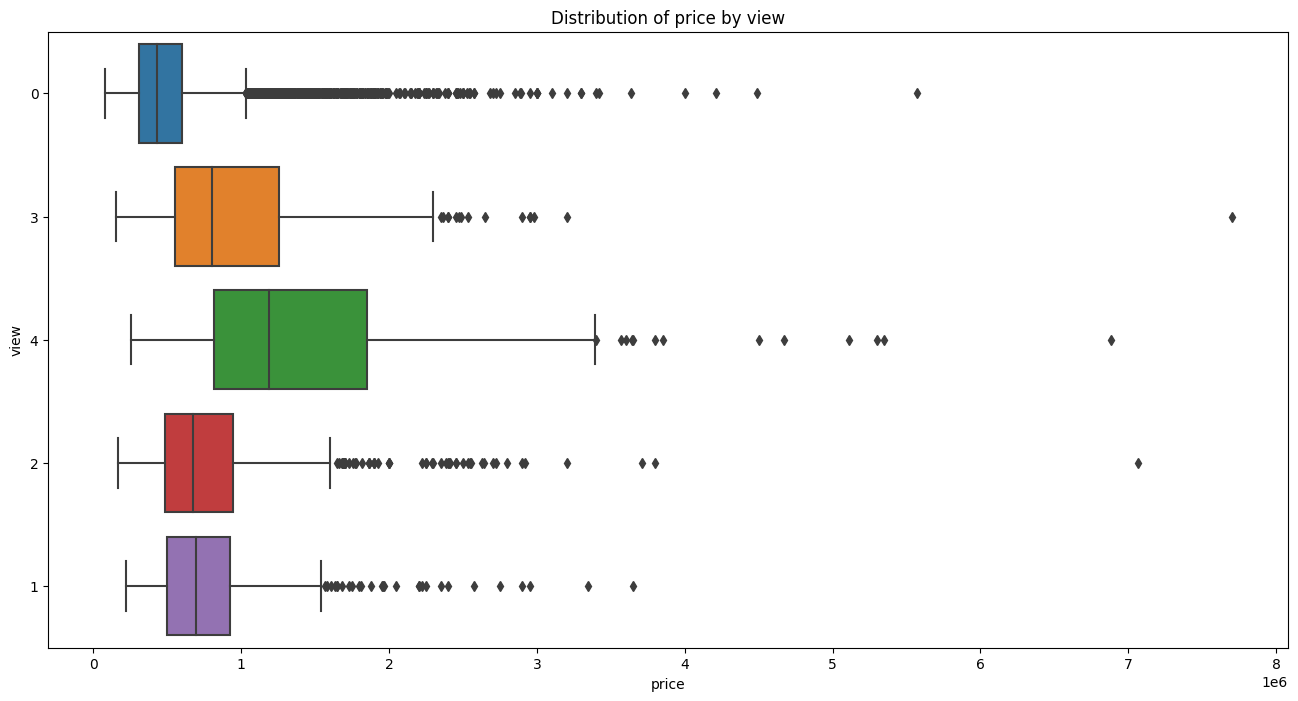

In [36]:
plt.figure(figsize=(16,8))
sns.boxplot(x=df['price'],y=df['view'].astype('str'),whis=1.5)
plt.xlabel('price')
plt.ylabel('view')
plt.title('Distribution of price by view');